**CompulsoryTask1**

In [110]:
# Import libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

iris_df = pd.read_csv('Iris.csv')
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [111]:
# Identify dependent and independent variables.
X = iris_df.iloc[:,[0,1,2,3]].values
y = iris_df.iloc[:,-1].values
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [112]:
# Encode variables.
le = LabelEncoder()
y = le.fit_transform(y)
y = np.where(y == 2, 1, y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [113]:
# Split data in training and test set.
X_train, X_test, y_train, y_test = train_test_split(X, 
                y, test_size=0.25, random_state=0)

In [114]:
# Fit the model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions on test data
y_pred = log_reg.predict(X_test)

In [115]:
# Generate a confusion matrix.
cf_m = confusion_matrix(y_test, y_pred)
cf_m

# Make it a bit prettier.
cf_df = pd.DataFrame(cf_m, columns=['0', '1'], 
                     index=['0', '1'])
cf_df

,0,1
0,13,0
1,0,25


<Axes: >

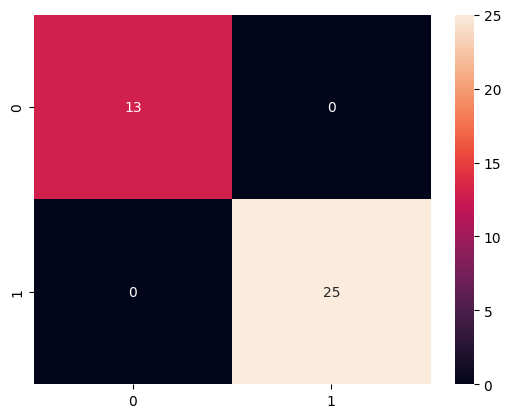

In [116]:
# Easier to use seaborn heatmap:
import seaborn as sns
sns.heatmap(cf_m, annot=True)

Recap:  
Rows: Represent the true labels.  
Columns: Represent the predicted labels.

Cell [0,0] - 13:  
13 times when class 0 ('Iris-setosa') was predicted and class 0 (‘Iris-setosa') was the true outcome. (True Positive)  

Cell [1,1] - 25:  
25 times when class 1 ('not-Iris-setosa') was predicted and class 1 ('not-Iris-setosa') was the true outcome. (True Negative)

Cell [0,1] - 0:  
0 times when class 1 was predicted and class 0 was the true outcome. (False Negative)  

Cell [1,0] - 0:  
0 times when class 0 was predicted and class 1 was the true outcome. (False Positive)   

I predict that the model is likely to have similar recall and precision. Both should be high.

In [117]:
# Calculate the accuracy, precision, recall.
def accuracy(TP, TN, FN, FP):
    acc = (TP + TN)/(TP + FN + TN + FP)
    print(f"The accuray is {acc * 100}%.")


def precision(TP, FP):
    pres = TP / (TP + FP) 
    print(f"The precision is {pres * 100}%.")


def recall(TP, FN):
    rec = TP / (TP + FN)
    print(f"The recall is {rec * 100}%.")

In [118]:
accuracy(13, 15, 0, 0)
precision(13, 0)
recall(13, 0)

The accuray is 100.0%.
The precision is 100.0%.
The recall is 100.0%.


Optional Task

In [119]:
# Encode variables to the numeric values 1, 2, 3.
y2 = iris_df.iloc[:,-1].values
y2 = le.fit_transform(y2)
y2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [120]:
# Scale the data.
X = preprocessing.scale(X)

In [121]:
# Split data in training and test set.
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, 
                y2, test_size=0.25, random_state=0)
y_train2

array([1, 1, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1,
       0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2,
       2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0,
       2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1,
       2, 0])

In [122]:
# Fit the model
log_reg = LogisticRegression()
log_reg.fit(X_train2, y_train2)

# Make predictions on test data
y_pred2 = log_reg.predict(X_test2)

In [123]:
# Generate a confusion matrix.
cf_m2 = confusion_matrix(y_test2, y_pred2)

# Make it a bit prettier.
cf_df2 = pd.DataFrame(cf_m2, columns=['0', '1', '2'], 
                      index=['0', '1', '2'])
cf_df2

,0,1,2
0,13,0,0
1,0,16,0
2,0,0,9


<Axes: >

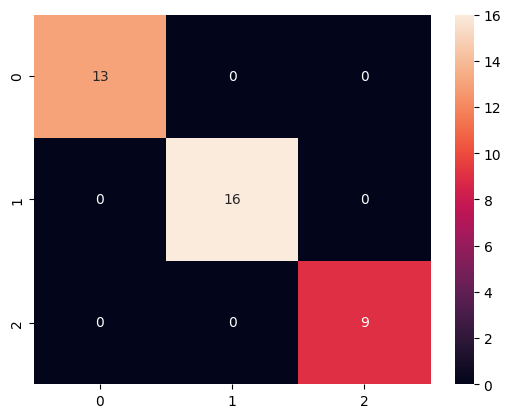

In [124]:
# Easier to use seaborn heatmap:
import seaborn as sns
sns.heatmap(cf_m2, annot=True)

Cell [0,0] - 13:  
13 times when class 0 was predicted and class 0 was the true outcome. 

Cell [1,1] - 16:  
16 times when class 1 was predicted and class 1 was the true outcome. 

Cell [2,2] - 9:  
9 times when class 2 was predicted and class 2 was the true outcome. 

It looks like all the data was predicted correctly. 